In [28]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import yfinance as yf

ui = yf.Ticker('USDINR=X')

hist = ui.history(period='5y')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-03-31,66.367996,66.367996,65.940002,66.367996,0,0,0
2016-04-01,66.248001,66.489998,66.120003,66.248001,0,0,0
2016-04-04,66.358002,66.370003,66.016998,66.358002,0,0,0
2016-04-05,66.134003,66.500000,65.610001,66.133003,0,0,0
2016-04-06,66.468002,66.730003,66.309998,66.468002,0,0,0
...,...,...,...,...,...,...,...
2021-03-25,72.645599,73.137001,72.550003,72.645599,0,0,0
2021-03-26,72.612801,72.660004,72.370300,72.612801,0,0,0
2021-03-29,72.447304,72.827400,72.447304,72.447197,0,0,0


<AxesSubplot:xlabel='Date'>

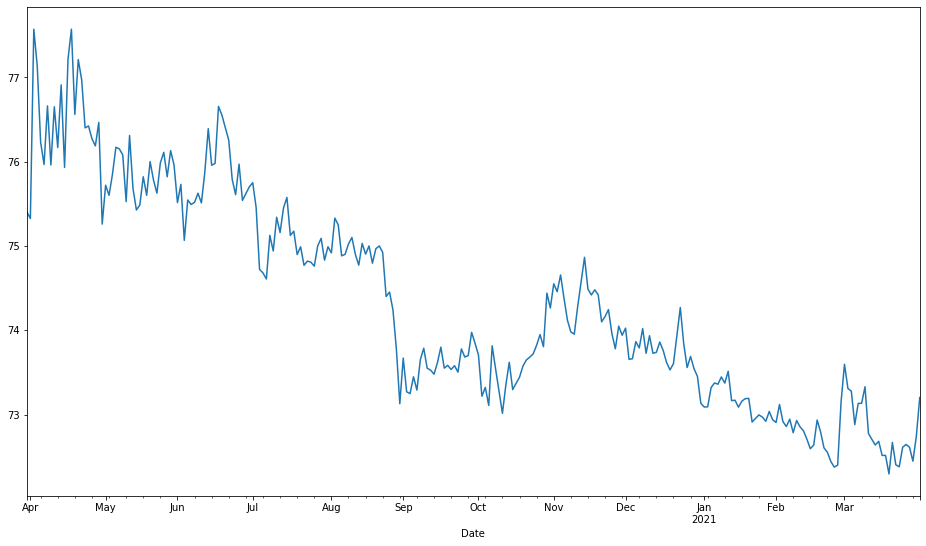

In [13]:
hist['Close'].plot(figsize=(16,9))

In [19]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-03-31,66.367996,66.367996,65.940002,66.367996,0,0,0
2016-04-01,66.248001,66.489998,66.120003,66.248001,0,0,0
2016-04-04,66.358002,66.370003,66.016998,66.358002,0,0,0
2016-04-05,66.134003,66.500000,65.610001,66.133003,0,0,0
2016-04-06,66.468002,66.730003,66.309998,66.468002,0,0,0


In [29]:
close = hist[['Close']]
close

,Close
Date,
2016-03-31,66.367996
2016-04-01,66.248001
2016-04-04,66.358002
2016-04-05,66.133003
2016-04-06,66.468002
...,...
2021-03-25,72.645599
2021-03-26,72.612801
2021-03-29,72.447197


In [37]:
close.reset_index(drop=True, level=0, inplace=True)
close

,Close
0,66.367996
1,66.248001
2,66.358002
3,66.133003
4,66.468002
...,...
1277,72.645599
1278,72.612801
1279,72.447197
1280,72.741898


In [67]:
df = pd.DataFrame(columns=['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'])
df.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7


In [68]:
for i in range(close.shape[0]-6):
    df = df.append({'Day 1' : close['Close'][i], 'Day 2' : close['Close'][i+1], 'Day 3' : close['Close'][i+2], 'Day 4' : close['Close'][i+3], 'Day 5' : close['Close'][i+4], 'Day 6' : close['Close'][i+5], 'Day 7' : close['Close'][i+6]}, ignore_index=True)
df.head()  

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,66.367996,66.248001,66.358002,66.133003,66.468002,66.532997,66.778999
1,66.248001,66.358002,66.133003,66.468002,66.532997,66.778999,66.543999
2,66.358002,66.133003,66.468002,66.532997,66.778999,66.543999,66.290001
3,66.133003,66.468002,66.532997,66.778999,66.543999,66.290001,66.315002
4,66.468002,66.532997,66.778999,66.543999,66.290001,66.315002,66.525002


In [70]:
for i in range(df.shape[0]):
    if df['Day 7'][i] >= df['Day 6'][i]:
        df['Day 7'][i] = 1
    else:
        df['Day 7'][i] = 0
df.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,66.367996,66.248001,66.358002,66.133003,66.468002,66.532997,1.0
1,66.248001,66.358002,66.133003,66.468002,66.532997,66.778999,0.0
2,66.358002,66.133003,66.468002,66.532997,66.778999,66.543999,0.0
3,66.133003,66.468002,66.532997,66.778999,66.543999,66.290001,1.0
4,66.468002,66.532997,66.778999,66.543999,66.290001,66.315002,1.0


In [136]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
split = []

In [94]:
n = df.shape[0]

train = df[0:int(0.7*n)]
cval = df[int(0.7*n):int(0.9*n)]
test = df[int(0.9*n):]

cval.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [130]:
x_train = train.iloc[:,:6]
y_train = train.iloc[:,6]
x_cval = cval.iloc[:,:6]
y_cval = cval.iloc[:,6]
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6]


In [131]:
x_train_mean = x_train.mean()
x_train_std = x_train.std()

x_train = (x_train - x_train_mean)/x_train_std
x_cval = (x_cval - x_train_mean)/x_train_std
x_test = (x_test - x_train_mean)/x_train_std



In [138]:
x_train.shape

(893, 6)

In [215]:
model = keras.Sequential(
    [
        layers.Dense(20, input_shape=(6,)),
        layers.Dense(10),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [216]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [217]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
9/9 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.5058
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.5034
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2550 - accuracy: 0.4727
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.4589
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.4740
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5192
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.2501 - accuracy: 0.5320
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.5077
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.5199
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.5313
Epoch 11/50
9/9 [======================

In [224]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.2458 - accuracy: 0.5312


[0.2457657754421234, 0.53125]

In [219]:
model.predict(x_cval)

array([[0.5473066 ],
       [0.5276061 ],
       [0.39879152],
       [0.40261993],
       [0.48080513],
       [0.52644557],
       [0.5689537 ],
       [0.5039541 ],
       [0.48483402],
       [0.54149514],
       [0.43068013],
       [0.5144189 ],
       [0.522465  ],
       [0.4674068 ],
       [0.46528614],
       [0.47770196],
       [0.55949837],
       [0.44200754],
       [0.47400495],
       [0.47381213],
       [0.41688523],
       [0.4671614 ],
       [0.45289418],
       [0.44307172],
       [0.41956964],
       [0.4911688 ],
       [0.5392348 ],
       [0.46969098],
       [0.4882276 ],
       [0.50018066],
       [0.49310365],
       [0.4834127 ],
       [0.49781725],
       [0.5309186 ],
       [0.5340952 ],
       [0.4494437 ],
       [0.43580619],
       [0.48506   ],
       [0.4372741 ],
       [0.5444981 ],
       [0.53314626],
       [0.50892454],
       [0.54708415],
       [0.49377233],
       [0.5271836 ],
       [0.52957445],
       [0.47445372],
       [0.442

In [220]:
top_idx = model.predict(x_cval).argsort(axis=0)[-10:].reshape(10,)


In [221]:
print(np.take(model.predict(x_cval), top_idx))

[0.5873237  0.59226036 0.6079155  0.6150258  0.6151047  0.63984036
 0.6477947  0.6503445  0.66403913 0.73614   ]


In [222]:
x_top_pred = np.take(x_cval, top_idx, axis=0)
y_top_pred = np.take(y_cval, top_idx)
y_top_pred

127    1.0
113    1.0
231    1.0
190    0.0
136    1.0
126    0.0
144    1.0
119    0.0
111    1.0
120    1.0
Name: Day 7, dtype: float64

In [223]:
model.evaluate(x_top_pred, y_top_pred)

1/1 [==============================] - 0s 43ms/step - loss: 0.2156 - accuracy: 0.7000


[0.21555688977241516, 0.699999988079071]